# Shifting Demographics: Tracing changes in immigrants from non-western countries from 2019 to 2029

**How has the number of immigrants from non-western countries in Denmark developed from 2019 to 2020?**

In 2019, Denmark was home to 250,000 non-Western immigrants, marking them as a significant portion of the national demographic fabric. Following the Russia-Ukraine conflict, we anticipate a substantial influx of Ukrainian immigrants, further amplifying the presence of non-Western individuals within the country together with the evolution of non-western immigrants to be mainly caused by the evolution of ukranians.

This expected increase must have a big impact in the danish society as well as the social costs. Therefore, we analyse the evolution of non-Western immigrant numbers from 2019 to 2024. By merging two datasets from Denmark Statistics, we aim not only to chart the historical trajectory but also to forecast the future trends of non-Western immigration into Denmark up until 2029, providing invaluable insights into the changing dynamics of the Danish population.

We use the following data from danish statistics FRDK123 samt BEF5.



In [14]:
# The DST API wrapper
%pip install git+https://github.com/alemartinello/dstapi

  Cloning https://github.com/alemartinello/dstapi to /private/var/folders/vj/6g81hjn17q380scpmx_msb8c0000gn/T/pip-req-build-ijcuq2ia
  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi /private/var/folders/vj/6g81hjn17q380scpmx_msb8c0000gn/T/pip-req-build-ijcuq2ia
  Resolved https://github.com/alemartinello/dstapi to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [15]:
# A wrapper for multiple APIs with a pandas interface
%pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


Imports and set magics:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Read and clean data

We start off by importing the two data sets from Denmark Statistics, statistikbanken.dk:

**1. FOLK1E**: *Population on the 1st of the quarter by area, gender, age, and origin.* We use this data-set so we can sort it by non-western immigrants. 


**FRDK123**: *Population projection 2023 for the entire country by origin, gender, and age*. We can deceompose the projection so we only look at non-western immigrants.

We import **FOLK1E** and **FRDK123**, both as API-files.

## 1.1) FOLK1E

In [17]:
FOLK = DstApi('FOLK1E')

In [18]:
tabsum = FOLK.tablesummary(language='en')
display(tabsum)

Table FOLK1E: Population at the first day of the quarter by region, sex, age, ancestry and time
Last update: 2024-02-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,105,000,All Denmark,851,Aalborg,False
1,KØN,3,TOT,Total,2,Women,False
2,ALDER,127,IALT,"Age, total",125,125 years,False
3,HERKOMST,6,TOT,Total,35,Descendants from non-western countries,False
4,Tid,65,2008K1,2008Q1,2024K1,2024Q1,True


**I want the following for each variable:**

0. *OMRÅDE* to be All Denmark (Code **000**)
1. *KØN* to be Total (Code **TOT**)
2. *Alder* to be all ages from 1-105.
3. *HERKOMST* to be Immigrants from non-western countries (Code **25**)
4. *Tid* to be the years from 2019-2024, where i only look at the first quarters 


I see that the data contains 5 different variables. I want to sort the data, but in order to see which value the variables can take, i use the code below for the variables:

In [19]:
params = FOLK._define_base_params(language='en')
params['variables'][0]['values'] = ['000']
params['variables'][1]['values'] = ['TOT']
params['variables'][2]['values'] = [str(i) for i in range(0, 106)]
params['variables'][3]['values'] = ['25']
#params['variables'][4]['values'] = ['2019-2024']


POP = FOLK.get_data(params=params)
# Remove " years" in variable "ALDER" and convert to string
POP['ALDER'] = POP['ALDER'].str.replace(" years", "").astype(str)
POP['ALDER'] = POP['ALDER'].str.replace(" year", "").astype(str)


In [20]:
# Keep only entries from the first quarter of each year
POP = POP[POP['TID'].str.endswith('Q1')]

# Extract the year from 'TID' and convert to integer
POP['TID'] = POP['TID'].str.extract('(\d+)').astype(int)

# Sort the DataFrame by 'TID' after modifying it
POP = POP.sort_values('TID')

# Check the DataFrame head to ensure it looks correct
POP.head(40)


,OMRÅDE,KØN,ALDER,HERKOMST,TID,INDHOLD
0,All Denmark,Total,0,Immigrants from non-western countries,2008,98
74,All Denmark,Total,74,Immigrants from non-western countries,2008,572
73,All Denmark,Total,73,Immigrants from non-western countries,2008,583
72,All Denmark,Total,72,Immigrants from non-western countries,2008,715
71,All Denmark,Total,71,Immigrants from non-western countries,2008,715
70,All Denmark,Total,70,Immigrants from non-western countries,2008,786
69,All Denmark,Total,7,Immigrants from non-western countries,2008,685
68,All Denmark,Total,69,Immigrants from non-western countries,2008,876
67,All Denmark,Total,68,Immigrants from non-western countries,2008,969
66,All Denmark,Total,67,Immigrants from non-western countries,2008,1102


Now that we have looked at the years up until 2024 in my first dataset **pop** we will take look at the population projection in the CSV file ***FRDK123***.

## 1.2) FRDK123

In [21]:
FRDK = DstApi('FRDK123')
tabsum = FRDK.tablesummary(language='en')
display(tabsum)

Table FRDK123: Population projections 2023 for the country by ancestry, sex, age and time
Last update: 2023-06-01T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,HERKOMST,5,999,Persons of danish origin,35,Descendants from non-western countries,False
1,KØN,2,M,Men,K,Women,False
2,ALDER,106,0,0 years,105-,105 years and over,False
3,Tid,48,2023,2023,2070,2070,True


**We want the following for each variable:**

0. *HERKOMST* to be All Denmark (Code **25**)
2. *Alder* to be all ages from 1-105
4. *Tid* to be the years from 2024-2029, which is not given in quarters, but years:


In [22]:
params = FRDK._define_base_params(language='en')
params['variables'][0]['values'] = ['25']  # Assuming this is correct for your query
params['variables'][3]['values'] = ['2023', '2024', '2025', '2026', '2027', '2028', '2029']

# Now fetch the data with the updated parameters
PROJ = FRDK.get_data(params=params)
# Proceed with your data processing

# Remove " years" in variable "ALDER" and convert to string
PROJ['ALDER'] = PROJ['ALDER'].str.replace(" years", "").astype(str)
PROJ['ALDER'] = PROJ['ALDER'].str.replace(" year", "").astype(str)

PROJ.head()


,HERKOMST,KØN,ALDER,TID,INDHOLD
0,Immigrants from non-western countries,Women,0,2023,90
1,Immigrants from non-western countries,Women,1,2023,354
2,Immigrants from non-western countries,Women,10,2023,1428
3,Immigrants from non-western countries,Women,100,2023,4
4,Immigrants from non-western countries,Women,101,2023,4


I want to sum women and men for each value of *ALDER* for each value of *TID*, so instead of having the values seperated by gender, i have them in total.

In [23]:
# Group the data by 'ALDER' and 'TID' and sum 'INDHOLD'
PROJ = PROJ.groupby(['ALDER', 'TID'], as_index=False)['INDHOLD'].sum()

# Assign a new 'KØN' column with the value 'Total' to the aggregated result
PROJ['KØN'] = 'Total'

# Now total_proj will have the total 'INDHOLD' for each 'ALDER' and 'TID' without separating by 'KØN'
PROJ.head()

,ALDER,TID,INDHOLD,KØN
0,0,2023,183,Total
1,0,2024,118,Total
2,0,2025,76,Total
3,0,2026,76,Total
4,0,2027,76,Total


We have now turned the two datasets, ***FOLK1E*** and ***FRDK123*** from Statistics Denmark into two new DataFrames, ***POP*** and ***PROJ***. We are now ready to explore the datasets further

# 2. Explore each data set

## 2.1) Exploring ***POP***

In [24]:
# Filter for the rows where 'ALDER' is 'Age, total'
age_total = POP['ALDER'] == 'Age, total'  # Replace 'Age, total' with the actual value from your data
POP_age_total = POP[age_total]

# Assuming you've already filtered by 'TID' to include only the first quarter years as earlier
plt.figure(figsize=(12, 6))
plt.plot(pop_age_total['TID'], pop_age_total['INDHOLD'], '-o')  # Line with circle markers
plt.title('Total Count by Year')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()

# Ensure 'ALDER' is already converted to the correct format as per previous instructions

# Define the age ranges, directly as strings
young_age_range = [str(age) for age in range(0, 17)]  # 0-16 years
# For senior ages, add the specific string that represents ages 105 and above if it exists in your dataset
senior_age_range = [str(age) for age in range(80, 106)] + ['105 and above']

# Filter the dataframe for the young age range and group by 'TID'
young_totals = POP[POP['ALDER'].isin(young_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Filter the dataframe for the senior age range and group by 'TID'
senior_totals = POP[POP['ALDER'].isin(senior_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Plot for young age range
plt.figure(figsize=(12, 6))
plt.plot(young_totals['TID'], young_totals['INDHOLD'], '-o', color='blue')
plt.title('Total Count by Year for Ages 0-16')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()

# Plot for senior age range
plt.figure(figsize=(12, 6))
plt.plot(senior_totals['TID'], senior_totals['INDHOLD'], '-o', color='green')
plt.title('Total Count by Year for Ages 80+')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()


NameError: name 'pop_age_total' is not defined

<Figure size 1200x600 with 0 Axes>

As shown in the above tabels, we see an increase in the count, both for 0-16, 80+ and the total count. This increase can primarily be explained by the war in Ukraine, which began in february 2022. The increase is very large for the 0-16 year olds, as children from Ukraine very quick to escape the war and flee to Denmark among others. On the other hand, the increase in count of 80+ is very small, because a lot of elderly people decided to stay in Ukraine, because escaping seemed too costly.

 ## LAV TABEL MED DEN ÅRLIGE ÆNDRING I DE TRE ALDERSGRUPPER

## 2.1) Exploring ***PROJ***

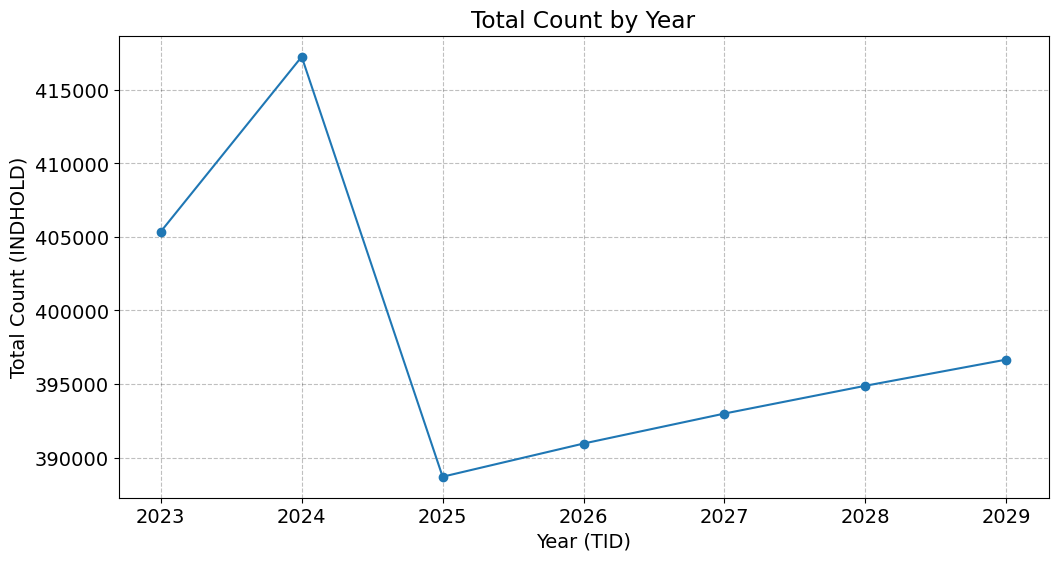

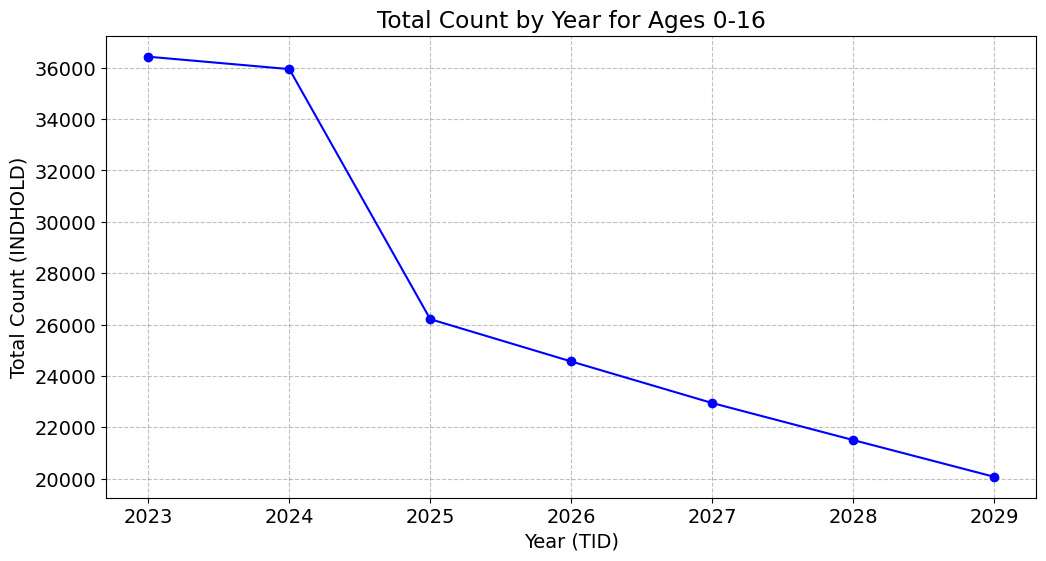

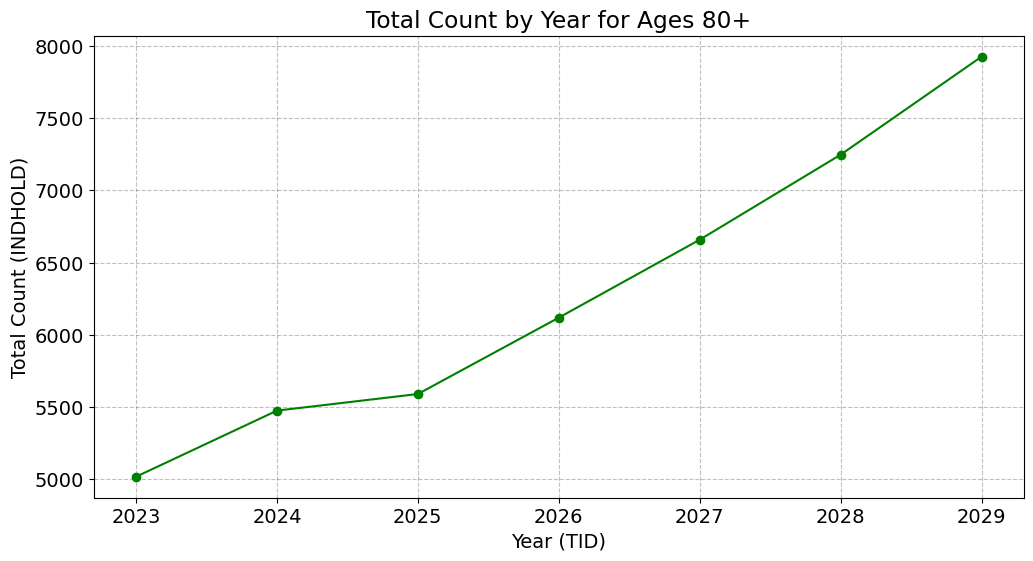

In [ ]:
import matplotlib.pyplot as plt

# Group by 'TID' and sum 'INDHOLD' to get the total for each year
yearly_totals = PROJ.groupby('TID')['INDHOLD'].sum().reset_index()

# Now plot this data
plt.figure(figsize=(12, 6))
plt.plot(yearly_totals['TID'], yearly_totals['INDHOLD'], '-o')  # Line with circle markers
plt.title('Total Count by Year')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()

# Ensure 'ALDER' is already converted to the correct format as per previous instructions

# Define the age ranges, directly as strings
young_age_range = [str(age) for age in range(0, 17)]  # 0-16 years
# For senior ages, add the specific string that represents ages 105 and above if it exists in your dataset
senior_age_range = [str(age) for age in range(80, 106)] + ['105 and above']

# Filter the dataframe for the young age range and group by 'TID'
young_totals = PROJ[PROJ['ALDER'].isin(young_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Filter the dataframe for the senior age range and group by 'TID'
senior_totals = PROJ[PROJ['ALDER'].isin(senior_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Plot for young age range
plt.figure(figsize=(12, 6))
plt.plot(young_totals['TID'], young_totals['INDHOLD'], '-o', color='blue')
plt.title('Total Count by Year for Ages 0-16')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()

# Plot for senior age range
plt.figure(figsize=(12, 6))
plt.plot(senior_totals['TID'], senior_totals['INDHOLD'], '-o', color='green')
plt.title('Total Count by Year for Ages 80+')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()



The projections above now shows different future trends, depending on the age groups. The age group from 0-16 will experience a large decline in 2025, and then see further emmigration from Denmark to Ukraine from 2026-2029. This builds on the assumption that young people will return to Ukraine immeadietly after the war, and help rebuild their former home. On the other hand, the projection of the 80+ year olds almost seems linear from 2023-2029. Again this is because of the possibility of emmigrating to another country is involved with too many concerns for elderly people. 

When looking at the overall trend, we see a large decrease in 2025 which is primarily driven by young people emmigrating back to Ukraine. The small linear increase from 2026-2029 is driven by other demographical factors, such as Denmark beeing a highly attractive workplace for educated foreigners.

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

# Merge data sets

Before we merge the datasets, we see that both datasets contain the year 2024. This is due to the year 2024 in PROJ is a projection of the actual population in 2024. Therefore, i want the following for all observations in the DataFrame PROJ:

$PROP_t^{actual} = PROJ_t^{previous} + (POP_{2024} - PROJ_{2024})$

With other words, we make our own projection, where we add the differente between the actual population in 2024 and the earlier expected population in 2024 to each year up until 2029.

In [ ]:
# Step 1: Calculate the Difference for 2024
# Ensure both datasets are sorted by 'TID' and 'ALDER'
POP = POP.sort_values(by=['TID', 'ALDER'])
PROJ = PROJ.sort_values(by=['TID', 'ALDER'])

# Filter both datasets for the year 2024
POP_2024 = POP[POP['TID'] == 2024]
PROJ_2024 = PROJ[PROJ['TID'] == 2024]

# Ensure the 'ALDER' columns are aligned; you may need to ensure both datasets cover the same age ranges
# Calculate the difference for each age
difference_2024 = POP_2024.set_index('ALDER')['INDHOLD'] - PROJ_2024.set_index('ALDER')['INDHOLD']


As we see, there is a diffrence between the actual and the expected number for each age. We therefore make a new dataset where we modify the dataset PROJ by adding the difference for each observation to all future observations until 2029.

In [ ]:
# Step 2: Apply the Adjustment
# For years 2025-2029, adjust based on the formula
for year in range(2025, 2030):
    # For each age, calculate PROJ_t_actual using the formula
    PROJ.loc[PROJ['TID'] == year, 'INDHOLD'] += difference_2024.reindex(PROJ[PROJ['TID'] == year]['ALDER']).values

# Note: This step assumes 'INDHOLD' is numeric and 'ALDER' in PROJ for future years aligns with the index of difference_2024
# You might need to adjust the code to handle any discrepancies in 'ALDER' values or data types


In [ ]:
# Group the data by 'ALDER' and 'TID' and sum 'INDHOLD'
PROJ = PROJ.groupby(['ALDER', 'TID'], as_index=False)['INDHOLD'].sum()

# Assign a new 'KØN' column with the value 'Total' to the aggregated result
PROJ['KØN'] = 'Total'

# Now total_proj will have the total 'INDHOLD' for each 'ALDER' and 'TID' without separating by 'KØN'
PROJ.head()

,ALDER,TID,INDHOLD,KØN
0,0,2023,183.0,Total
1,0,2024,118.0,Total
2,0,2025,105.0,Total
3,0,2026,105.0,Total
4,0,2027,105.0,Total


We now merge:

In [ ]:
import pandas as pd

# Assuming POP and PROJ are pandas DataFrames and 'TID' is your year column

# Filter out 2023 and 2024 from PROJ
PROJ_filtered = PROJ[~PROJ['TID'].isin([2023, 2024])]

# Concatenate POP with the filtered PROJ
combined_dataset = pd.concat([POP, PROJ_filtered], ignore_index=True)

# Optionally, sort by 'TID' if needed
combined_dataset_sorted = combined_dataset.sort_values(by='TID').reset_index(drop=True)

# Now, combined_dataset_sorted is your merged dataset, with 2023 and 2024 only from POP.


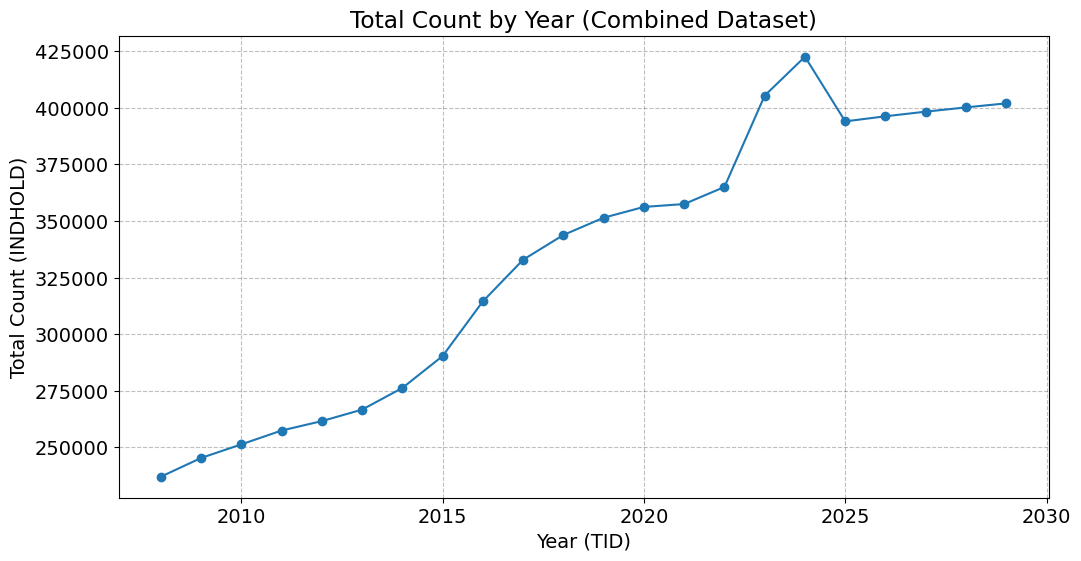

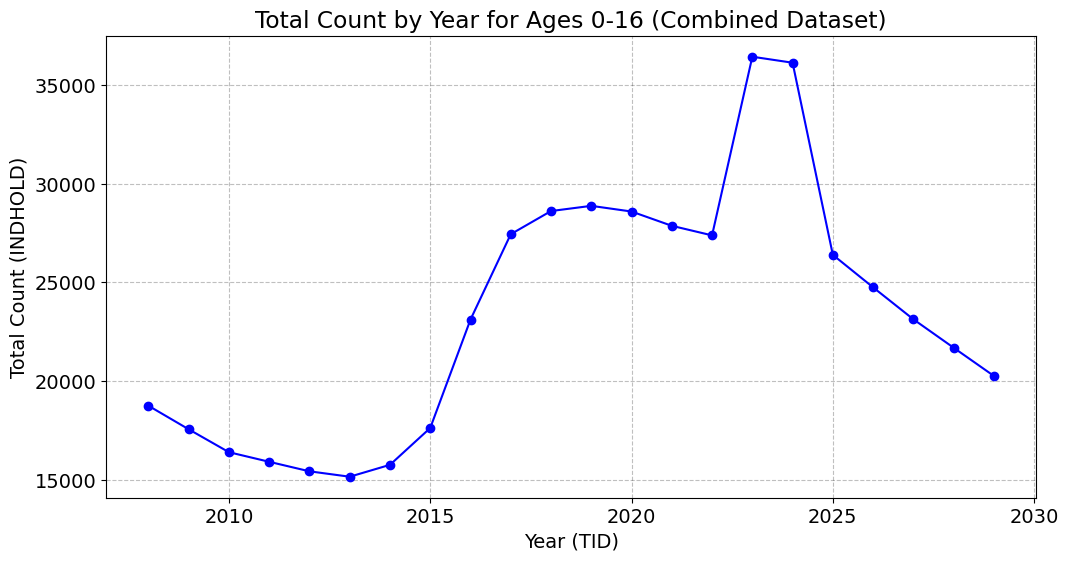

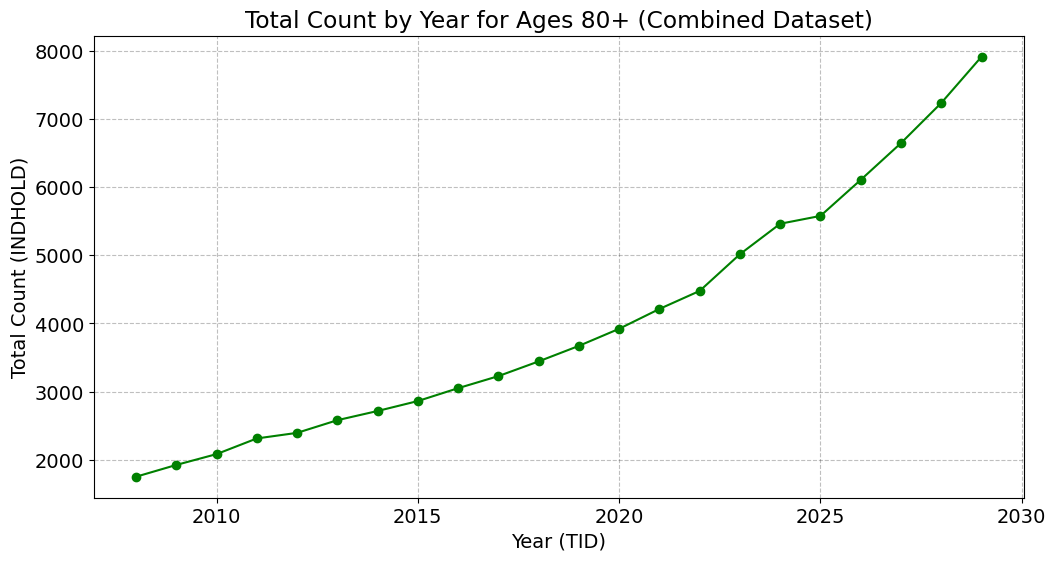

In [ ]:
import matplotlib.pyplot as plt

# Assuming combined_dataset_sorted is your new combined dataset
# Ensure 'ALDER' is converted to strings if it's not already

# Group by 'TID' and sum 'INDHOLD' to get the total for each year from the combined dataset
yearly_totals = combined_dataset_sorted.groupby('TID')['INDHOLD'].sum().reset_index()

# Plot total count by year for the combined dataset
plt.figure(figsize=(12, 6))
plt.plot(yearly_totals['TID'], yearly_totals['INDHOLD'], '-o')  # Line with circle markers
plt.title('Total Count by Year (Combined Dataset)')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()

# Define the age ranges, directly as strings
young_age_range = [str(age) for age in range(0, 17)]  # 0-16 years
# For senior ages, assume '105 and above' is represented as such if it exists
senior_age_range = [str(age) for age in range(80, 106)]  # 80-105 years

# Filter the combined dataset for the young age range and group by 'TID'
young_totals = combined_dataset_sorted[combined_dataset_sorted['ALDER'].isin(young_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Filter the combined dataset for the senior age range and group by 'TID'
senior_totals = combined_dataset_sorted[combined_dataset_sorted['ALDER'].isin(senior_age_range)].groupby('TID')['INDHOLD'].sum().reset_index()

# Plot for young age range
plt.figure(figsize=(12, 6))
plt.plot(young_totals['TID'], young_totals['INDHOLD'], '-o', color='blue')
plt.title('Total Count by Year for Ages 0-16 (Combined Dataset)')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()

# Plot for senior age range
plt.figure(figsize=(12, 6))
plt.plot(senior_totals['TID'], senior_totals['INDHOLD'], '-o', color='green')
plt.title('Total Count by Year for Ages 80+ (Combined Dataset)')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD)')
plt.grid(True)
plt.show()


In the figures above we see our merged dataset, now consisting of both the total population from 2008-2024 and the forecast for 2025-2029. The figures shows the evolution of immigrants from non-western countries from 2008-2029. All 3 figures describes the same trends we explained earlier.

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

NameError: name 'venn2' is not defined

<Figure size 1500x700 with 0 Axes>

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

What would happen, if the ukranian people never left? To discuss that, we'll assume, that the big decrease in non-western immigrants in 2025 never happened. With other words, the new INDHOLD for each value of ALDER is the change in the popoulation from 2024 to 2025:

$t_{new} = t_{old} + (2025_{old}-2024), \quad t=2025, 2026, 2028, 2028, 2029$

With other words, i want the following:

Calculate the difference between the INDHOLD values for each ALDER from 2024 to 2025.
Add a new column, say INDHOLD_adjusted, which will have the same values as INDHOLD for years 2008-2024.
For years 2025-2029, the INDHOLD_adjusted will be the sum of the INDHOLD value and the previously calculated difference for the corresponding ALDER.

In [ ]:
# Ensure 'INDHOLD_adjusted' column exists with the same initial values as 'INDHOLD'
combined_dataset_sorted['INDHOLD_adjusted'] = combined_dataset_sorted['INDHOLD']

# Step 1: Calculate the change from 2024 to 2025 for each ALDER
# Make sure to align and sort 'ALDER' indices if necessary to ensure correct subtraction
change_2024_to_2025 = combined_dataset_sorted[combined_dataset_sorted['TID'] == 2025].set_index('ALDER')['INDHOLD'] \
                      - combined_dataset_sorted[combined_dataset_sorted['TID'] == 2024].set_index('ALDER')['INDHOLD']

# Step 2: Adjust the values for years 2025 to 2029
for year in range(2025, 2030):  # This includes year 2029
    for alder in change_2024_to_2025.index:
        # Find indices for the specified year and ALDER
        idx = combined_dataset_sorted[(combined_dataset_sorted['TID'] == year) & (combined_dataset_sorted['ALDER'] == alder)].index
        # Ensure 'INDHOLD_adjusted' is being correctly modified
        if len(idx) > 0:  # Ensure the index list is not empty
            combined_dataset_sorted.loc[idx, 'INDHOLD_adjusted'] = combined_dataset_sorted.loc[idx, 'INDHOLD'] - change_2024_to_2025[alder]

NameError: name 'combined_dataset_sorted' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Group by 'TID' and sum 'INDHOLD_adjusted' to get the total for each year from the combined dataset
yearly_totals_adjusted = combined_dataset_sorted.groupby('TID')['INDHOLD_adjusted'].sum().reset_index()

# Plot total count by year for the combined dataset using 'INDHOLD_adjusted'
plt.figure(figsize=(12, 6))
plt.plot(yearly_totals_adjusted['TID'], yearly_totals_adjusted['INDHOLD_adjusted'], '-o')
plt.title('Total Count by Year (Adjusted)')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD_adjusted)')
plt.grid(True)
plt.show()

# Define the age ranges, directly as strings
young_age_range = [str(age) for age in range(0, 17)]  # 0-16 years
senior_age_range = [str(age) for age in range(80, 106)]  # 80-105 years

# Filter the combined dataset for the young age range and group by 'TID', using 'INDHOLD_adjusted'
young_totals_adjusted = combined_dataset_sorted[combined_dataset_sorted['ALDER'].isin(young_age_range)].groupby('TID')['INDHOLD_adjusted'].sum().reset_index()

# Filter the combined dataset for the senior age range and group by 'TID', using 'INDHOLD_adjusted'
senior_totals_adjusted = combined_dataset_sorted[combined_dataset_sorted['ALDER'].isin(senior_age_range)].groupby('TID')['INDHOLD_adjusted'].sum().reset_index()

# Plot for young age range using 'INDHOLD_adjusted'
plt.figure(figsize=(12, 6))
plt.plot(young_totals_adjusted['TID'], young_totals_adjusted['INDHOLD_adjusted'], '-o', color='blue')
plt.title('Total Count by Year for Ages 0-16 (Adjusted)')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD_adjusted)')
plt.grid(True)
plt.show()

# Plot for senior age range using 'INDHOLD_adjusted'
plt.figure(figsize=(12, 6))
plt.plot(senior_totals_adjusted['TID'], senior_totals_adjusted['INDHOLD_adjusted'], '-o', color='green')
plt.title('Total Count by Year for Ages 80+ (Adjusted)')
plt.xlabel('Year (TID)')
plt.ylabel('Total Count (INDHOLD_adjusted)')
plt.grid(True)
plt.show()

NameError: name 'combined_dataset_sorted' is not defined

# Conclusion

ADD CONCISE CONLUSION.